# InfiniBand Traffic Monitor Results

## Python Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from pprint import pprint

## Configuration

In [23]:
# Color palette
CB_color_cycle = {
    "blue":'#377eb8',
    "orange":'#ff7f00',
    "green":'#4daf4a',
    "pink":'#f781bf',
    "brown":'#a65628',
    "purple":'#984ea3',
    "gray":'#999999',
    "red":'#e41a1c',
    "yellow":'#dede00'
}

nodes = ["o186i221", "o186i222"]
monitor_id = "root-20230911-223325"
experiment_dir = "ibmon/example"
experiment = f"{monitor_id}_total_aggregate.ibmon.csv"

dataframe = pd.read_csv(f"{experiment_dir}/{experiment}", header=0)

#dataframe
KB = 1000
MB = 1000 * KB
GB = 1000 * MB
dataframe

,timestamp,PortXmitData_mlx5_0_o186i221,PortRcvData_mlx5_0_o186i221,PortXmitPkts_mlx5_0_o186i221,PortRcvPkts_mlx5_0_o186i221,PortXmitWait_mlx5_0_o186i221,PortXmitData_mlx5_1_o186i221,PortRcvData_mlx5_1_o186i221,PortXmitPkts_mlx5_1_o186i221,PortRcvPkts_mlx5_1_o186i221,...,PortRcvData_sum_o186i222,PortXmitWait_sum_o186i222,PortRcvPkts_sum_o186i222,PortXmitPkts_sum_o186i222,PortXmitData_sum_o186i222,PortRcvPkts_sum_aggregate,PortXmitPkts_sum_aggregate,PortRcvData_sum_aggregate,PortXmitWait_sum_aggregate,PortXmitData_sum_aggregate
0,0,8370206,2668626,30788,29536,0,561006,732558,8176,11041,...,2948116,0,43985,32646,2211632,106375,87692,7783207,0,12233580
1,1,2392,1897,52,37,0,1080,1113,15,16,...,4974,0,78,90,5428,143,167,8770,0,9620
2,2,1008,1008,14,14,0,1314,1303,19,19,...,1962,0,28,28,1951,91,91,6325,0,6303
3,3,1399,1079,28,21,0,882,871,13,13,...,2940,0,48,55,3307,97,111,5952,0,6686
4,4,2438,1847,51,37,0,864,864,12,12,...,17154,0,74,79,4264,138,157,20927,0,8664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,2077,1741,63,47,0,864,864,12,12,...,2909,0,55,63,3060,126,150,6369,0,6874
104,104,1302,1136,36,28,0,864,864,12,12,...,3431,0,59,67,3590,111,127,6286,0,6629
105,105,1365,1217,37,29,0,1087,1098,16,16,...,3715,0,65,73,3932,126,142,7182,0,7536
106,106,1590,1424,40,32,0,1087,1098,16,16,...,2567,0,47,55,2726,113,129,6376,0,6708


## Plotting

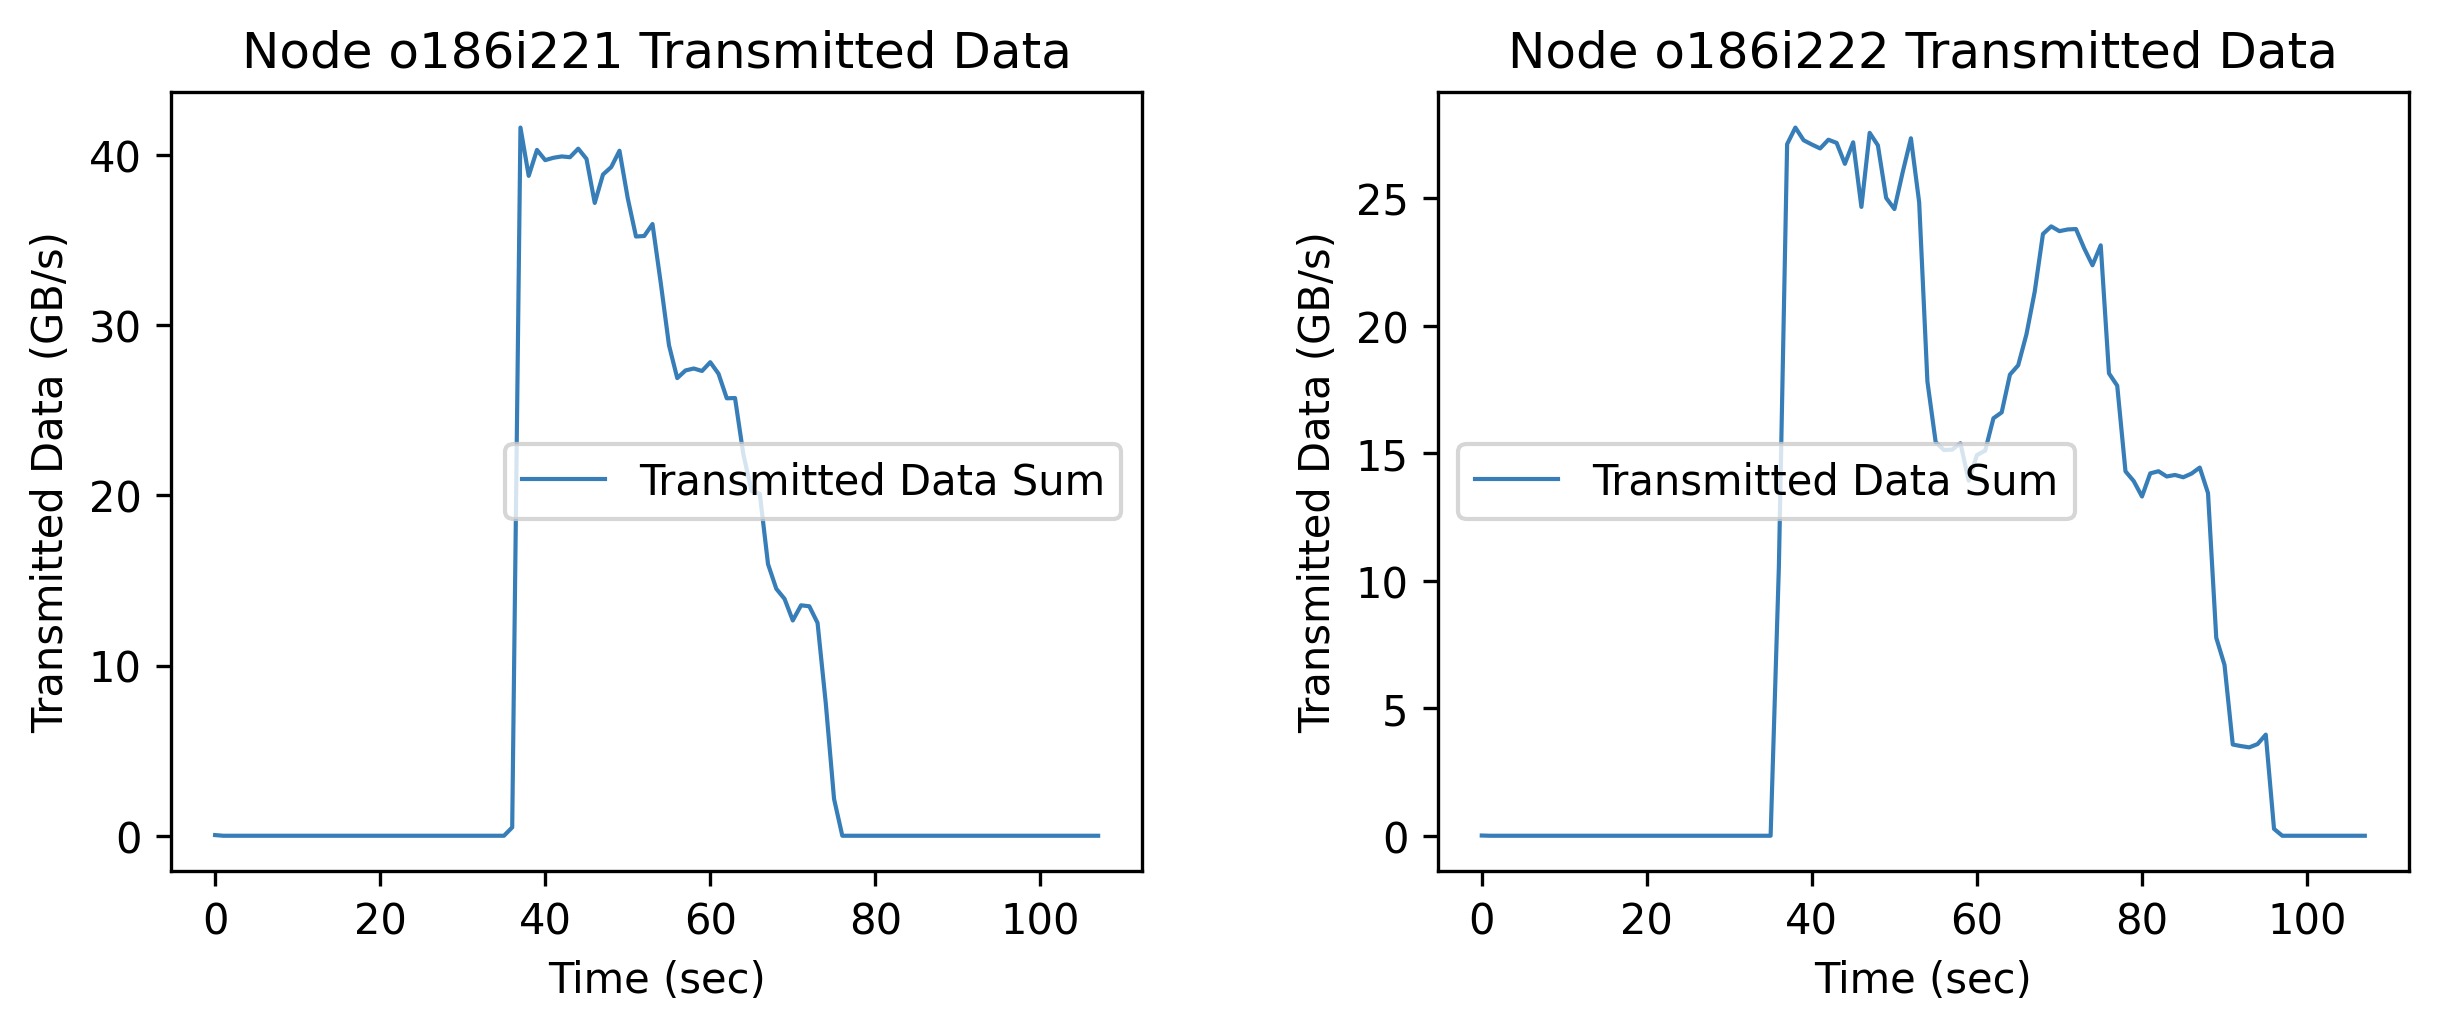

In [24]:
number_rows = 1
number_cols = 2

fig, ax = plt.subplots(nrows=number_rows, ncols=number_cols, figsize=(9,4), dpi=300)
fig.tight_layout(pad=4)

ax[0].plot(
    dataframe["timestamp"],
    dataframe[f"PortXmitData_sum_{nodes[0]}"] * 4 / GB,
    lw=1, label="Transmitted Data Sum",
    color=CB_color_cycle["blue"]
)

ax[0].set_title(f"Node {nodes[0]} Transmitted Data")
ax[0].set_ylabel("Transmitted Data (GB/s)")
ax[0].set_xlabel("Time (sec)")
ax[0].legend()


ax[1].plot(
    dataframe["timestamp"],
    dataframe[f"PortXmitData_sum_{nodes[1]}"] * 4 / GB,
    lw=1, label="Transmitted Data Sum",
    color=CB_color_cycle["blue"]
)

ax[1].set_title(f"Node {nodes[1]} Transmitted Data")
ax[1].set_ylabel("Transmitted Data (GB/s)")
ax[1].set_xlabel("Time (sec)")
ax[1].legend()

plt.show()